# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Global Layoffs Hiring Trends Dataset](https://www.kaggle.com/datasets/dmahajanbe23/global-layoffs-and-hiring-trends-dataset-20202026)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/kaggle/input/global-layoffs-and-hiring-trends-dataset-20202026/global_layoffs_2020_2026.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('global_layoffs_2020_2026.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,company,industry,country,continent,layoff_date,layoff_count,workforce_percentage,funding_stage,total_funding_million_usd,stock_price_change_7d,hiring_status,reason,revenue_growth_percent,market_cap_billion_usd,company_size,layoff_severity_score,ai_automation_flag,economic_cycle_flag
0,Company_0,Finance,USA,North America,2023-01-31,86,8.15,Series A,1560.48,-3.99,Hiring,M&A Activity,-8.75,298.47,Startup,700.90,0,Tech Correction
1,Company_1,Finance,Singapore,Asia,2020-12-22,26,14.01,IPO,290.02,-4.28,Hiring,Cost Cutting,6.20,325.48,Mid-size,364.26,0,Pandemic Impact
2,Company_2,Finance,Germany,Europe,2022-08-10,213,8.09,IPO,370.89,4.60,Hiring,Restructuring,-34.19,152.19,Enterprise,1723.17,0,Tech Correction
3,Company_3,Retail,Singapore,Asia,2024-09-14,350,21.47,Series A,802.72,-9.14,Slowdown,Market Downturn,8.33,23.43,Mid-size,7514.50,0,AI Restructuring
4,Company_4,Tech,UK,Europe,2024-09-27,410,21.06,Series B,1186.87,0.01,Hiring,AI Automation,-12.26,23.32,Mid-size,8634.60,1,AI Restructuring


## last Five row

In [4]:
df.tail()

,company,industry,country,continent,layoff_date,layoff_count,workforce_percentage,funding_stage,total_funding_million_usd,stock_price_change_7d,hiring_status,reason,revenue_growth_percent,market_cap_billion_usd,company_size,layoff_severity_score,ai_automation_flag,economic_cycle_flag
14995,Company_14995,Healthcare,Brazil,South America,2022-12-28,275,24.61,Series B,929.41,-0.73,Freeze,M&A Activity,26.58,433.08,Enterprise,6767.75,0,Tech Correction
14996,Company_14996,Finance,Japan,Asia,2024-10-31,270,39.97,Series B,1459.54,-3.44,Freeze,Restructuring,17.20,242.51,Startup,10791.90,0,AI Restructuring
14997,Company_14997,Retail,UK,Europe,2025-05-21,180,23.08,Series A,222.16,-0.61,Freeze,Restructuring,15.29,218.35,Enterprise,4154.40,0,AI Restructuring
14998,Company_14998,FinTech,Japan,Asia,2024-09-13,230,26.04,Seed,1484.65,-3.85,Hiring,M&A Activity,7.00,338.77,Startup,5989.20,0,AI Restructuring
14999,Company_14999,Manufacturing,Canada,North America,2026-01-12,46,2.47,Series A,692.19,-2.41,Hiring,Overexpansion,25.01,257.16,Mid-size,113.62,0,AI Restructuring


## Shape of our dataset

In [5]:
df.shape

(15000, 18)

## List out all columns

In [6]:
df.columns

Index(['company', 'industry', 'country', 'continent', 'layoff_date',
       'layoff_count', 'workforce_percentage', 'funding_stage',
       'total_funding_million_usd', 'stock_price_change_7d', 'hiring_status',
       'reason', 'revenue_growth_percent', 'market_cap_billion_usd',
       'company_size', 'layoff_severity_score', 'ai_automation_flag',
       'economic_cycle_flag'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

company                       object
industry                      object
country                       object
continent                     object
layoff_date                   object
layoff_count                   int64
workforce_percentage         float64
funding_stage                 object
total_funding_million_usd    float64
stock_price_change_7d        float64
hiring_status                 object
reason                        object
revenue_growth_percent       float64
market_cap_billion_usd       float64
company_size                  object
layoff_severity_score        float64
ai_automation_flag             int64
economic_cycle_flag           object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    15000 non-null  object 
 1   industry                   15000 non-null  object 
 2   country                    15000 non-null  object 
 3   continent                  15000 non-null  object 
 4   layoff_date                15000 non-null  object 
 5   layoff_count               15000 non-null  int64  
 6   workforce_percentage       15000 non-null  float64
 7   funding_stage              15000 non-null  object 
 8   total_funding_million_usd  15000 non-null  float64
 9   stock_price_change_7d      15000 non-null  float64
 10  hiring_status              15000 non-null  object 
 11  reason                     15000 non-null  object 
 12  revenue_growth_percent     15000 non-null  float64
 13  market_cap_billion_usd     15000 non-null  flo

## Check Null Value

In [9]:
df.isnull().sum()

company                      0
industry                     0
country                      0
continent                    0
layoff_date                  0
layoff_count                 0
workforce_percentage         0
funding_stage                0
total_funding_million_usd    0
stock_price_change_7d        0
hiring_status                0
reason                       0
revenue_growth_percent       0
market_cap_billion_usd       0
company_size                 0
layoff_severity_score        0
ai_automation_flag           0
economic_cycle_flag          0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,layoff_count,workforce_percentage,total_funding_million_usd,stock_price_change_7d,revenue_growth_percent,market_cap_billion_usd,layoff_severity_score,ai_automation_flag
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,228.115667,20.400375,1000.756969,-3.087381,4.933979,250.115934,6080.475953,0.163400
std,203.178308,11.307665,574.307162,8.020019,14.993276,144.667845,7261.302473,0.369743
min,0.000000,1.000000,5.040000,-32.050000,-55.970000,0.150000,0.000000,0.000000
25%,71.000000,10.570000,501.945000,-8.520000,-5.090000,124.055000,831.120000,0.000000
50%,169.000000,20.290000,1003.890000,-3.150000,4.995000,249.585000,3231.630000,0.000000
75%,327.000000,30.360000,1496.577500,2.300000,15.100000,376.612500,8858.980000,0.000000
max,1167.000000,40.000000,1999.720000,27.850000,60.740000,500.000000,46574.970000,1.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

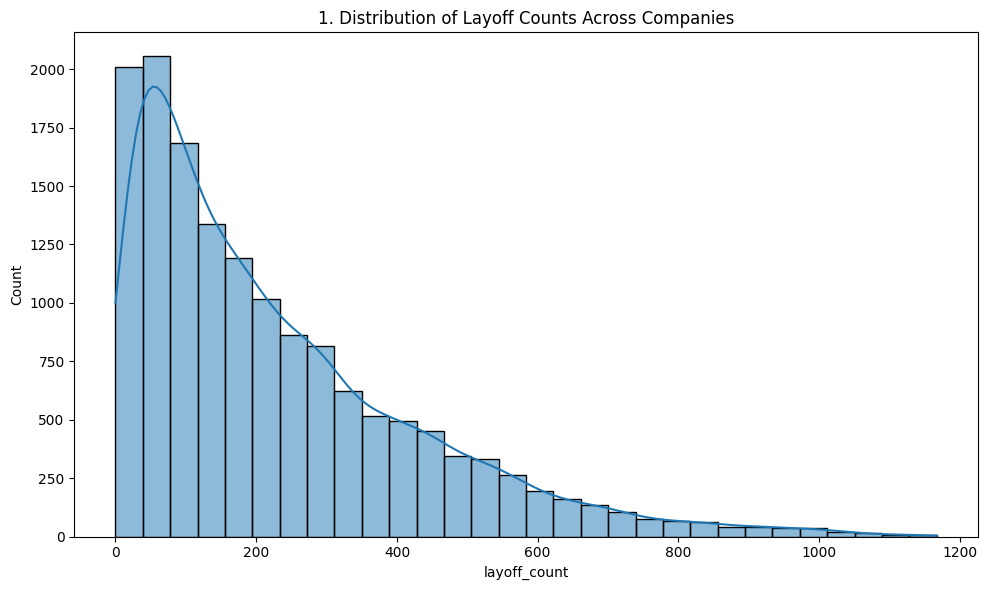

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['layoff_count'], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Layoff Counts Across Companies')
show_fig()
plot_no += 1


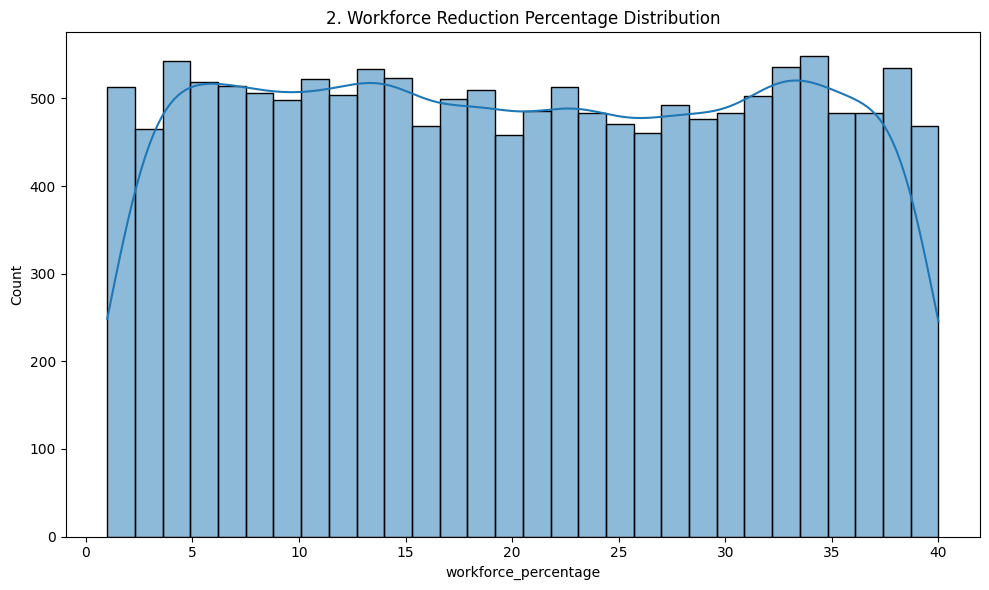

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['workforce_percentage'], bins=30, kde=True)
plt.title(f'{plot_no}. Workforce Reduction Percentage Distribution')
show_fig()
plot_no += 1


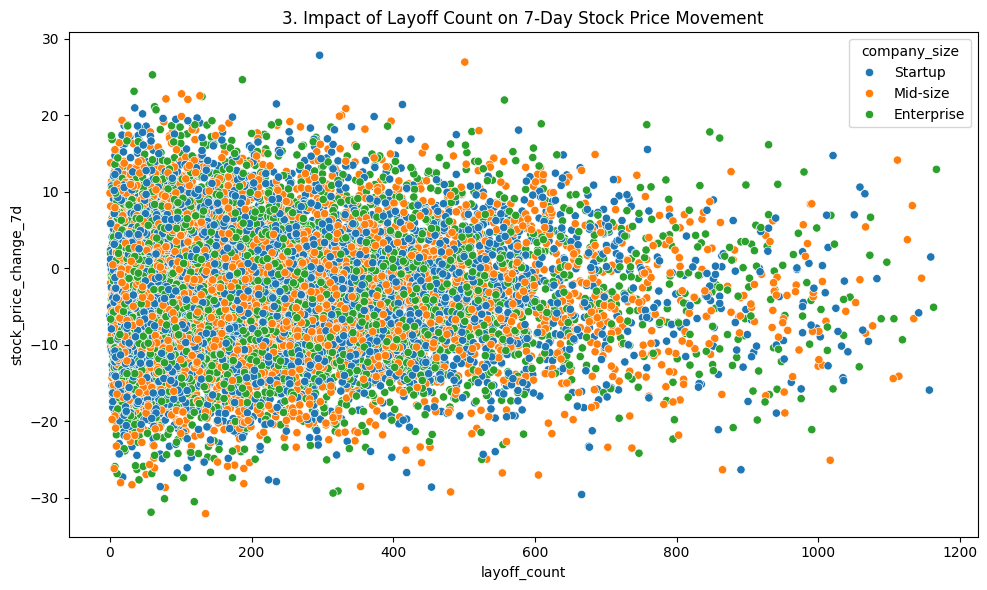

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='layoff_count', y='stock_price_change_7d', hue='company_size')
plt.title(f'{plot_no}. Impact of Layoff Count on 7-Day Stock Price Movement')
show_fig()
plot_no += 1


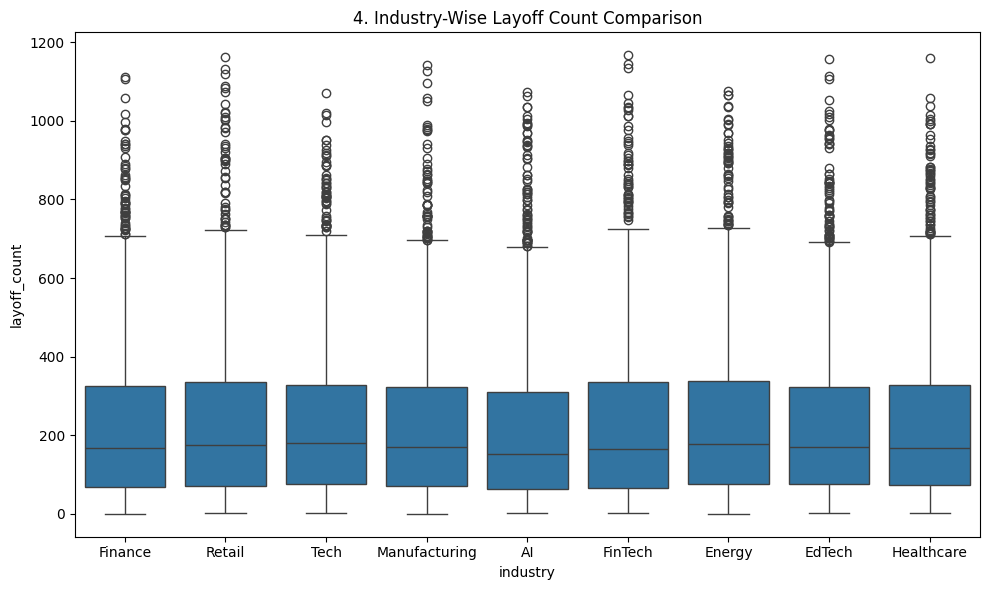

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='industry', y='layoff_count')
plt.title(f'{plot_no}. Industry-Wise Layoff Count Comparison')
show_fig()
plot_no += 1


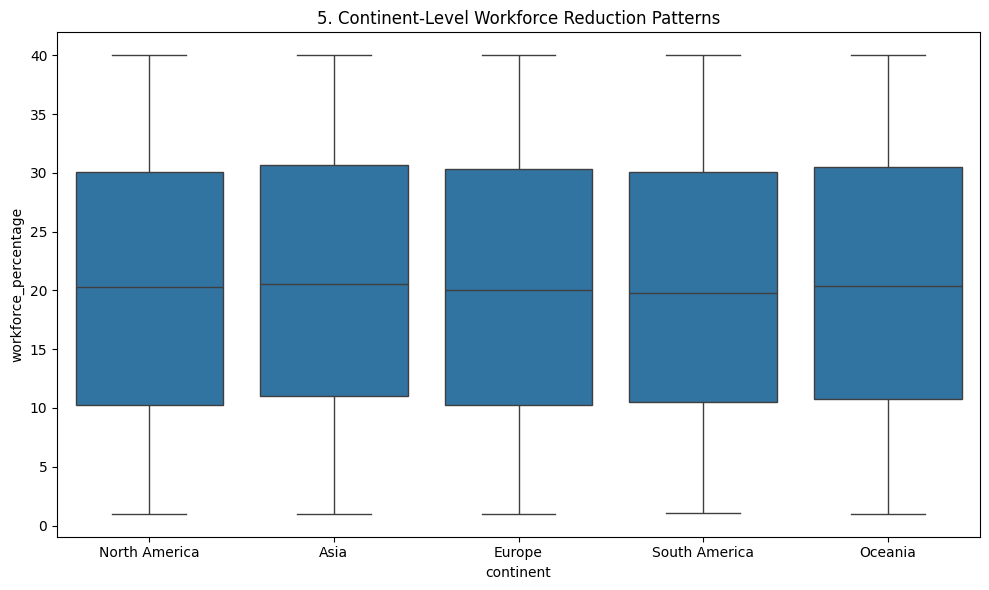

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='continent', y='workforce_percentage')
plt.title(f'{plot_no}. Continent-Level Workforce Reduction Patterns')
show_fig()
plot_no += 1


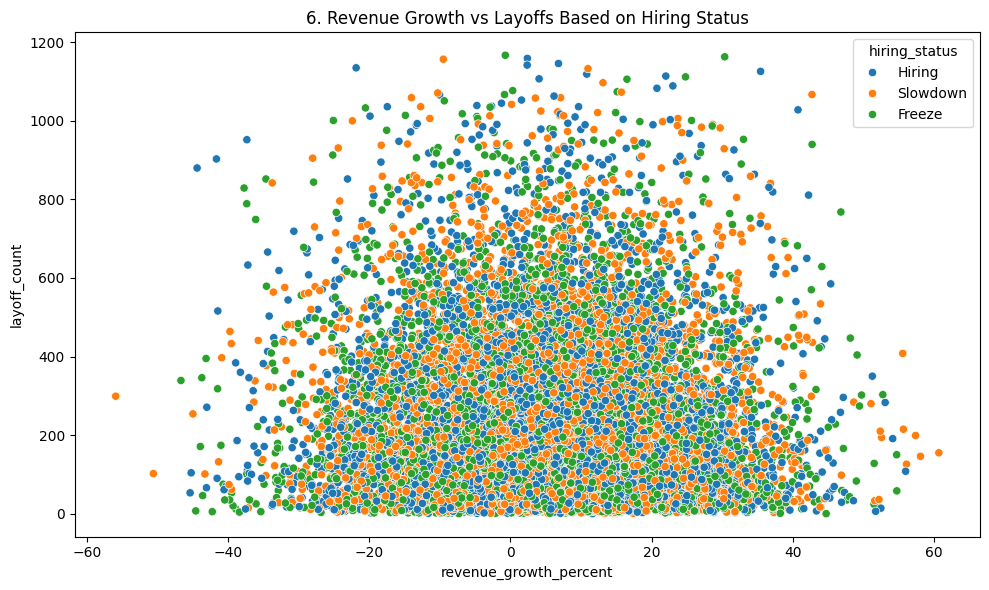

In [18]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='revenue_growth_percent', y='layoff_count', hue='hiring_status')
plt.title(f'{plot_no}. Revenue Growth vs Layoffs Based on Hiring Status')
show_fig()
plot_no += 1


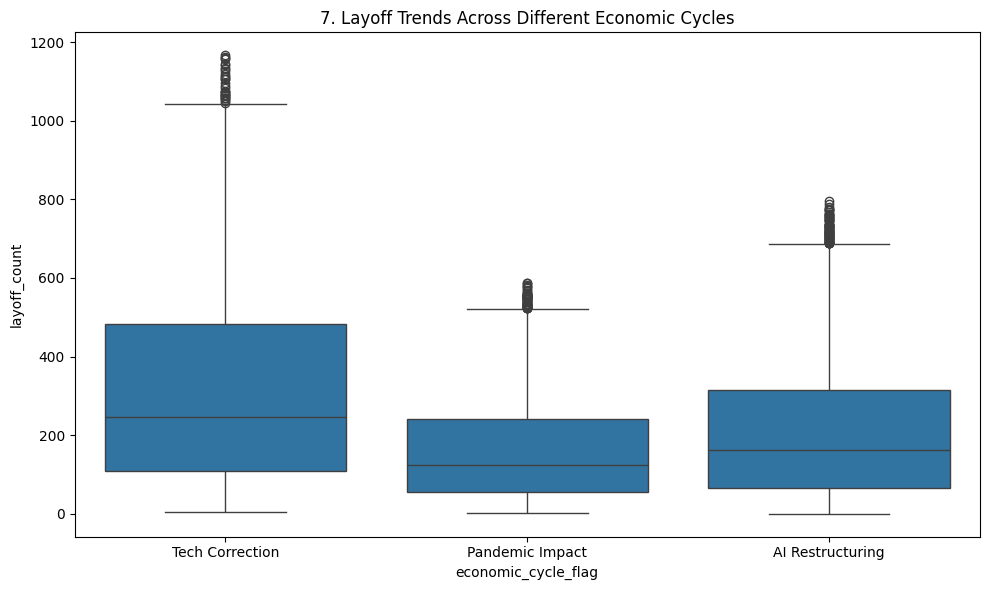

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='economic_cycle_flag', y='layoff_count')
plt.title(f'{plot_no}. Layoff Trends Across Different Economic Cycles')
show_fig()
plot_no += 1


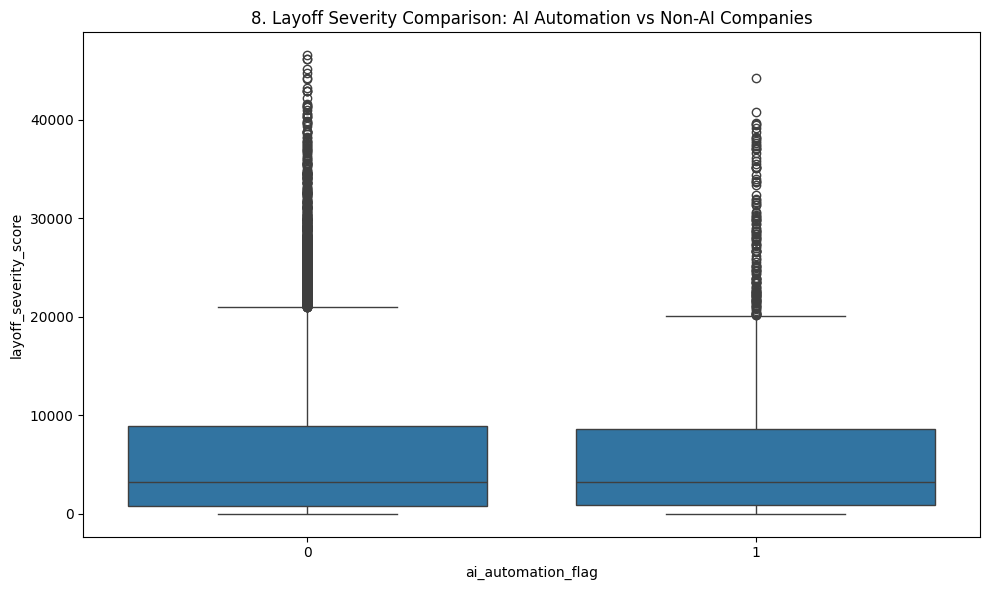

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ai_automation_flag', y='layoff_severity_score')
plt.title(f'{plot_no}. Layoff Severity Comparison: AI Automation vs Non-AI Companies')
show_fig()
plot_no += 1


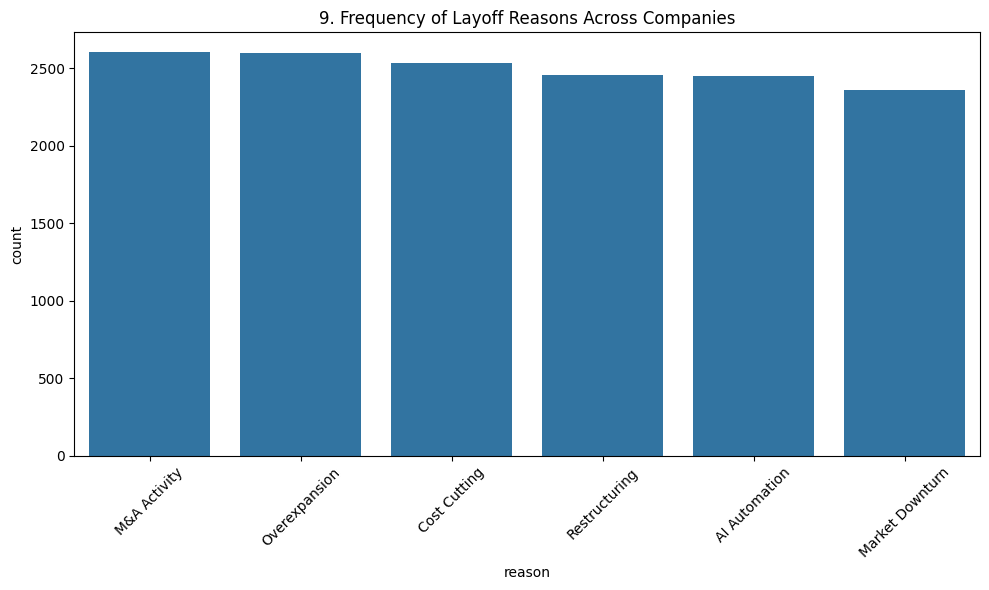

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='reason', order=df['reason'].value_counts().index)
plt.xticks(rotation=45)
plt.title(f'{plot_no}. Frequency of Layoff Reasons Across Companies')
show_fig()
plot_no += 1


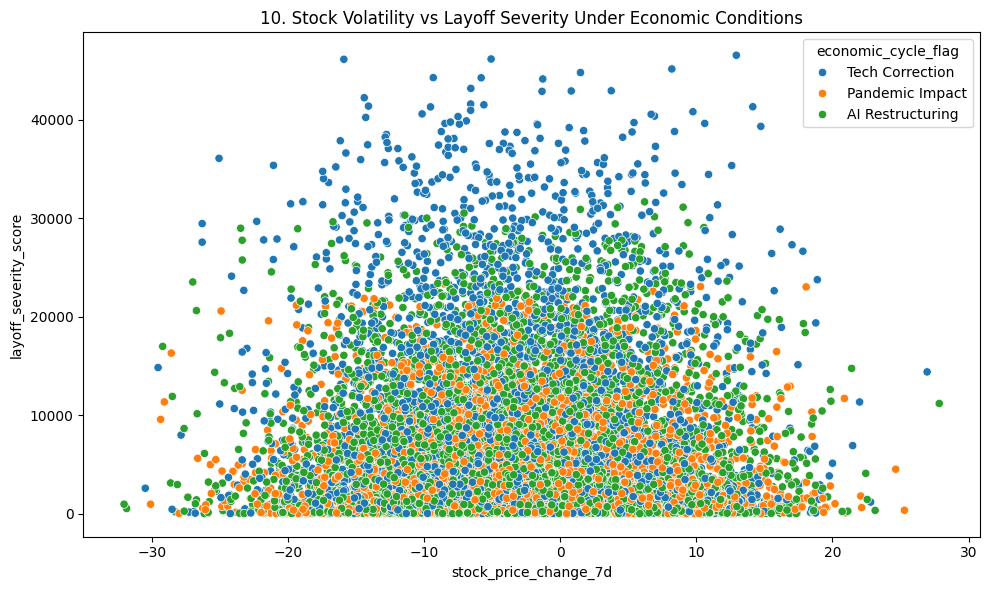

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='stock_price_change_7d', y='layoff_severity_score', hue='economic_cycle_flag')
plt.title(f'{plot_no}. Stock Volatility vs Layoff Severity Under Economic Conditions')
show_fig()
plot_no += 1


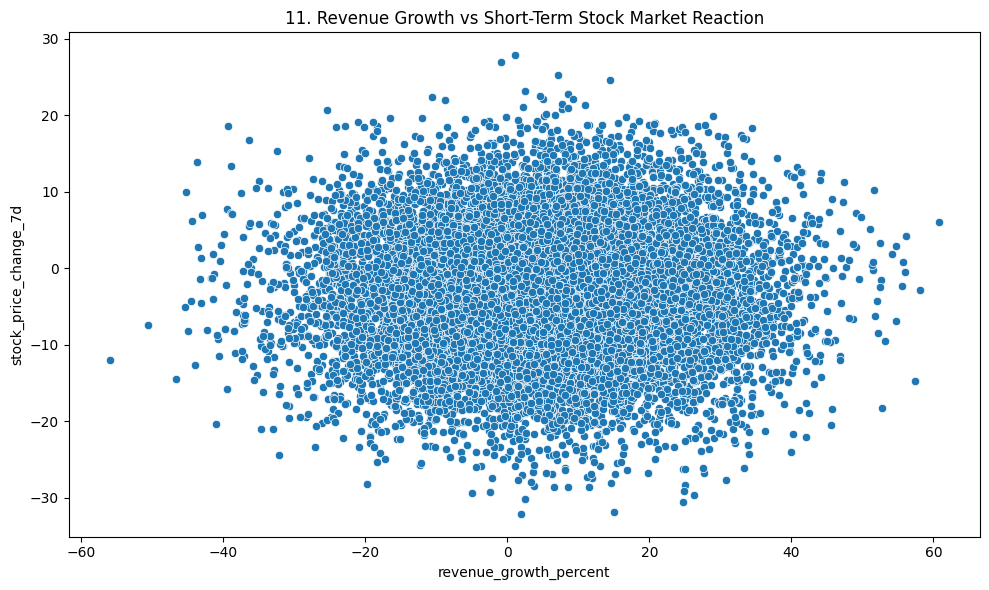

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='revenue_growth_percent', y='stock_price_change_7d')
plt.title(f'{plot_no}. Revenue Growth vs Short-Term Stock Market Reaction')
show_fig()
plot_no += 1


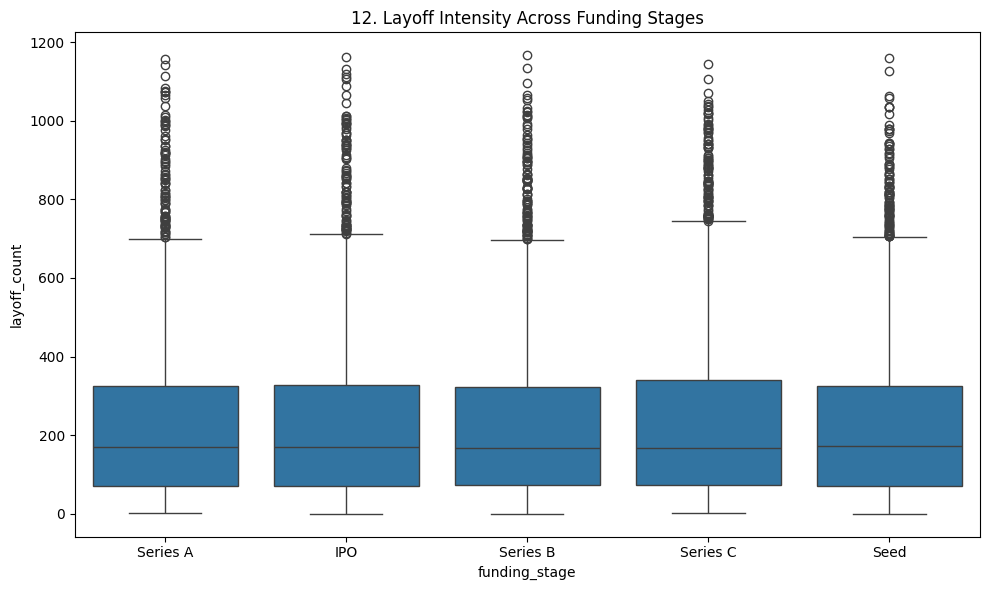

In [24]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='funding_stage', y='layoff_count')
plt.title(f'{plot_no}. Layoff Intensity Across Funding Stages')
show_fig()
plot_no += 1


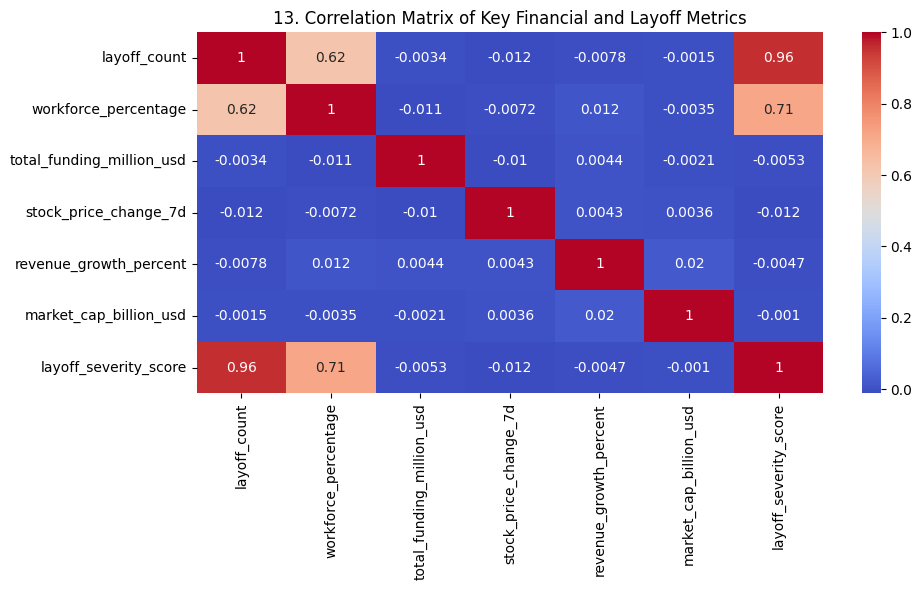

In [25]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['layoff_count','workforce_percentage','total_funding_million_usd','stock_price_change_7d','revenue_growth_percent','market_cap_billion_usd','layoff_severity_score']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Matrix of Key Financial and Layoff Metrics')
show_fig()
plot_no += 1


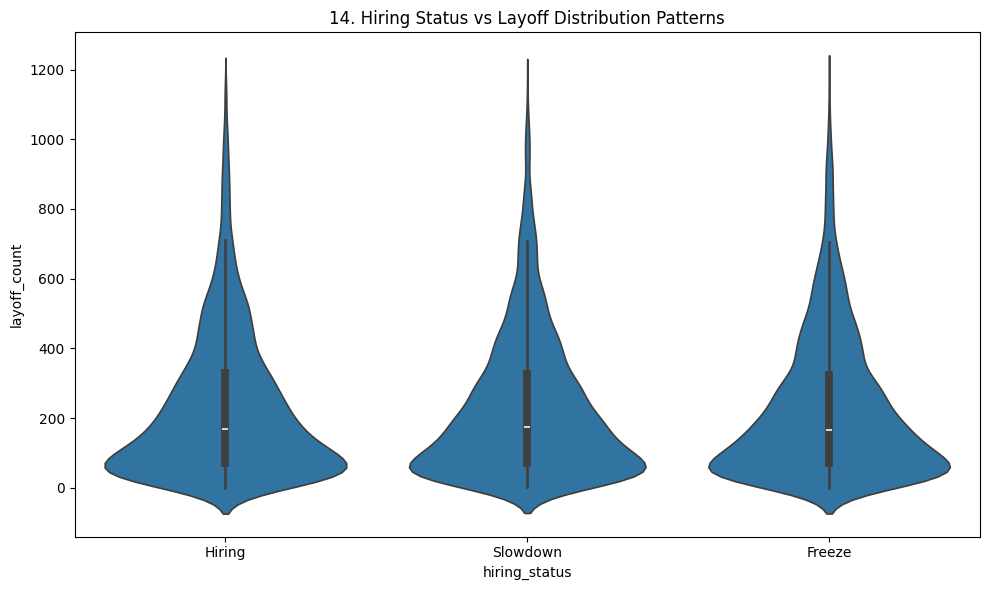

In [26]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='hiring_status', y='layoff_count')
plt.title(f'{plot_no}. Hiring Status vs Layoff Distribution Patterns')
show_fig()
plot_no += 1


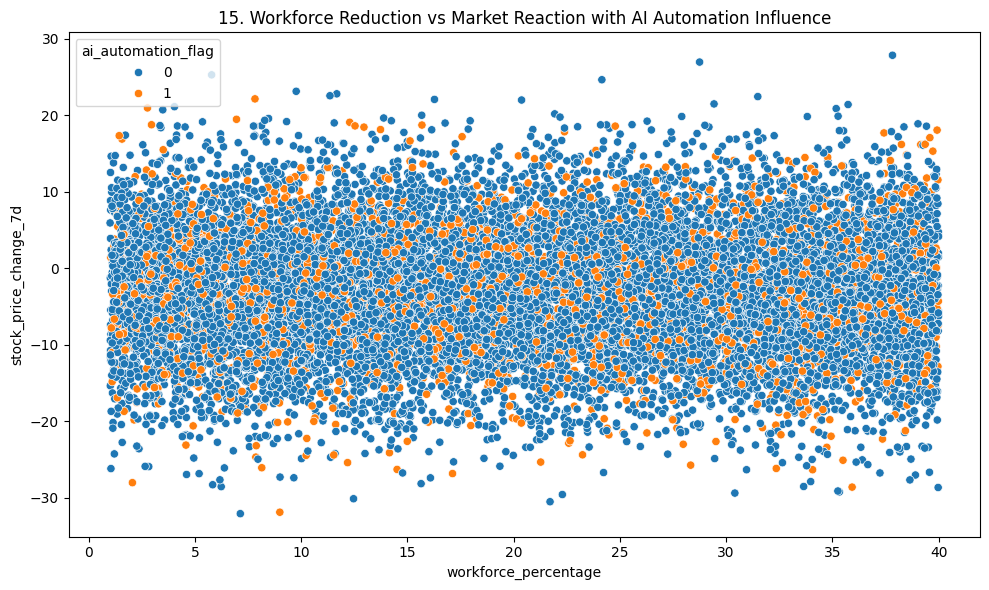

In [27]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='workforce_percentage', y='stock_price_change_7d', hue='ai_automation_flag')
plt.title(f'{plot_no}. Workforce Reduction vs Market Reaction with AI Automation Influence')
show_fig()
plot_no += 1


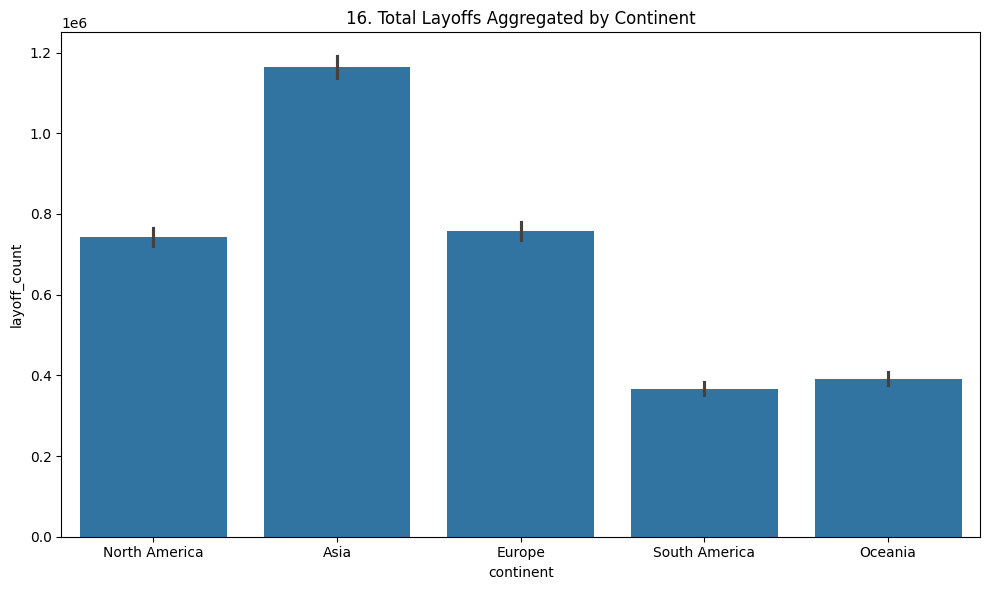

In [28]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='continent', y='layoff_count', estimator=sum)
plt.title(f'{plot_no}. Total Layoffs Aggregated by Continent')
show_fig()
plot_no += 1


# Model Training

## Create target variable: High Layoff 

In [29]:
df_model = df.copy()
df_model['high_layoff'] = (df_model['layoff_severity_score'] > df_model['layoff_severity_score'].median()).astype(int)

## Encode categorical features

In [30]:
categorical_cols = ['industry','country','continent','funding_stage','hiring_status','reason','company_size','economic_cycle_flag']
le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

## Convert date to numeric

In [31]:
df_model['layoff_date'] = pd.to_datetime(df_model['layoff_date'])
df_model['layoff_date'] = df_model['layoff_date'].map(pd.Timestamp.toordinal)

## Define features and target

In [32]:
X = df_model.drop(['company','layoff_severity_score','high_layoff'], axis=1)
y = df_model['high_layoff']

## Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature scaling

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Logistic Regression model

In [35]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Predictions

In [36]:
y_pred = model.predict(X_test)

## Accuracy score

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy Score:", accuracy)

Model Accuracy Score: 0.976


## Confusion Matrix

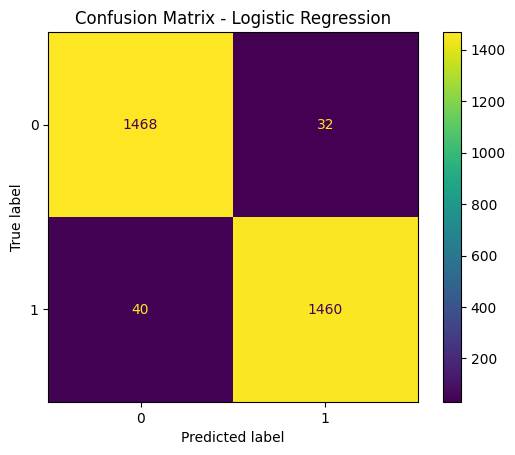

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()